In [28]:
from sklearn.decomposition import PCA
import pandas as pd 
from PIL import Image
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [64]:
df = pd.read_csv('data/filtered_df2.csv')

image_files = list(df['Image']) 

sample_img = Image.open("data/eyeball_img/" + image_files[0])
M, N = sample_img.size
print(f"Image Dimensions: {M}, {N}")

images_array = np.zeros((len(image_files), M * N * 3), dtype=np.float32)

for i, file in enumerate(image_files):
    img = Image.open("data/eyeball_img/" + file).convert('RGB')
    img_array = np.asarray(img, dtype=np.float32) / 255.0  # normalize to [0,1]
    images_array[i, :] = img_array.flatten()  # flatten

Image Dimensions: 1024, 512


In [65]:

pca = PCA(n_components = 100)
X_pca = pca.fit_transform(images_array)

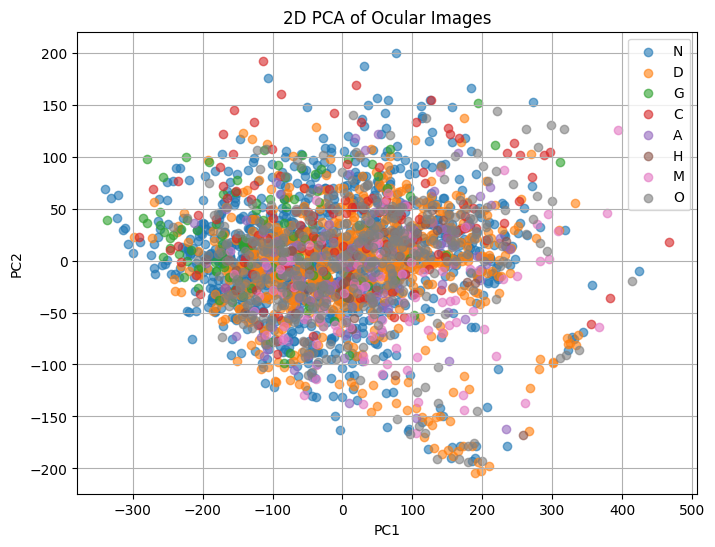

In [66]:


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
for i, label in enumerate(class_cols):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], label=label, alpha=0.6)

plt.title("2D PCA of Ocular Images")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
images_array.shape

(2589, 1572864)

In [50]:
from PIL import Image
import numpy as np
import os

image_dir = "data/eyeball_img"
image_files = list(df['Image'])  # from your CSV

target_size = (1024, 512)  # (width, height)
df = pd.read_csv('data/filtered_df2.csv')
images_array = np.zeros((len(image_files), 1024 * 512 * 3), dtype=np.float32)

for i, file in enumerate(image_files):
    img_path = os.path.join(image_dir, file)

    # Open and convert to RGB
    img = Image.open(img_path).convert('RGB')

    # Resize to 1024x512
    img = img.resize(target_size, Image.LANCZOS)

    # Convert to normalized numpy array
    img_array = np.asarray(img, dtype=np.float32) / 255.0

    # Flatten and store
    images_array[i, :] = img_array.flatten()


In [51]:

pca = PCA(n_components = 100)
X_pca = pca.fit_transform(images_array)

In [52]:
print(pca.singular_values_)        # Singular values (proportional to sqrt of eigenvalues)
print(pca.explained_variance_)     # Variance captured by each component
print(pca.explained_variance_ratio_)  # Ratio of total variance captured


[6373.302   2866.047   2415.6401  2089.6143  1929.4523  1787.4232
 1577.996   1505.058   1230.4135  1122.5286  1079.5857   962.82
  885.       859.31824  746.1687   737.85254  686.23645  657.551
  650.7996   609.52734  584.4303   574.7643   563.806    531.25287
  514.0048   503.28815  477.2991   463.6759   447.05722  419.01413
  411.55573  402.8948   395.3339   382.2841   375.37698  365.4166
  354.0005   343.42035  337.18124  323.97284  320.36786  313.36597
  308.60522  298.64963  293.75906  292.04807  287.7218   284.59018
  281.53244  276.05725  271.78772  269.50223  266.0465   265.5032
  260.51447  256.5435   254.2372   251.49161  243.9429   240.80063
  239.54053  235.19214  231.47041  227.43616  224.49815  221.97293
  218.96568  215.52563  213.62285  211.55675  210.73326  208.56648
  205.43956  201.96591  200.8673   197.33246  195.91345  194.9608
  189.79625  187.20345  184.11945  183.14629  182.24062  180.59422
  177.75497  176.5819   175.87857  172.58984  171.53474  171.41315
  16

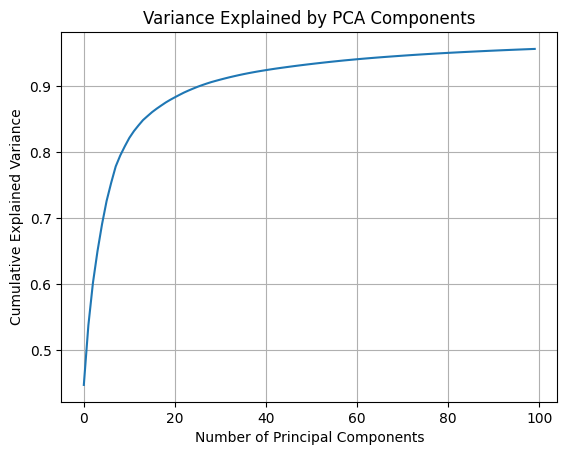

In [53]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by PCA Components')
plt.grid(True)
plt.show()


In [54]:
pca.components_  # shape: (n_components, n_features)


array([[-1.5610784e-05, -1.5634629e-05, -1.5634629e-05, ...,
        -2.1377444e-05, -2.1377444e-05, -2.1377444e-05],
       [ 1.1959466e-04,  1.1954399e-04,  1.1953781e-04, ...,
         1.4232036e-04,  1.4232036e-04,  1.4232036e-04],
       [ 1.7389306e-04,  1.7450754e-04,  1.7389825e-04, ...,
         2.1041371e-04,  2.1041371e-04,  2.1041371e-04],
       ...,
       [ 4.8975495e-04,  4.8878789e-04,  4.7533261e-04, ...,
        -1.9583889e-04, -1.9583857e-04, -1.9583845e-04],
       [ 3.8898346e-04,  3.6110505e-04,  3.6203591e-04, ...,
        -9.9066820e-05, -9.9066958e-05, -9.9066994e-05],
       [-1.1610614e-04, -1.2114270e-04, -1.3497239e-04, ...,
        -1.7959243e-04, -1.7959230e-04, -1.7959203e-04]], dtype=float32)

In [20]:
df[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].values

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [60]:
class_cols = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

y = df[class_cols].values.argmax(axis=1)

idx2label = {i: name for i, name in enumerate(class_cols)}

In [61]:
idx2label

{0: 'N', 1: 'D', 2: 'G', 3: 'C', 4: 'A', 5: 'H', 6: 'M', 7: 'O'}

In [62]:


# Assume you have corresponding labels in y
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train an SVM
clf = SVC(kernel='rbf')  # Or try 'linear'
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.80      0.56       205
           1       0.41      0.38      0.39       134
           2       0.00      0.00      0.00        20
           3       1.00      0.05      0.09        21
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00         4
           6       1.00      0.38      0.55        21
           7       0.50      0.01      0.02        81

    accuracy                           0.44       518
   macro avg       0.42      0.20      0.20       518
weighted avg       0.44      0.44      0.35       518



/home/accts/ltp8/miniconda/envs/pw/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/accts/ltp8/miniconda/envs/pw/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/accts/ltp8/miniconda/envs/pw/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

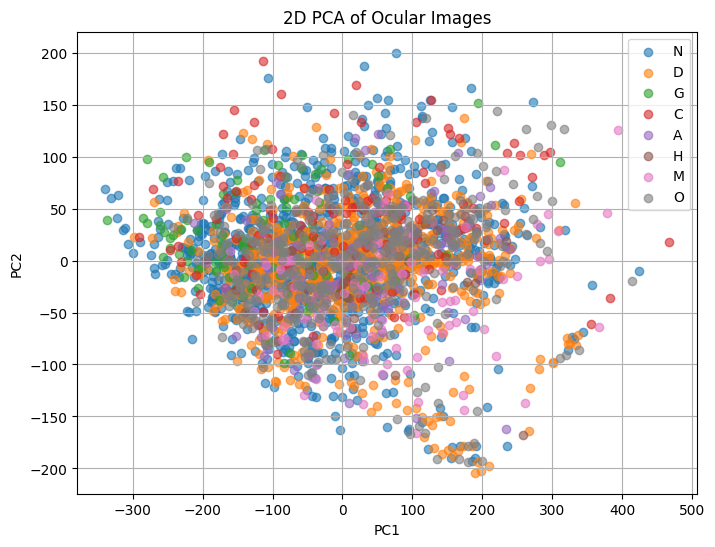

In [63]:


pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_pca)

plt.figure(figsize=(8, 6))
for i, label in enumerate(class_cols):
    plt.scatter(X_pca_2d[y == i, 0], X_pca_2d[y == i, 1], label=label, alpha=0.6)

plt.title("2D PCA of Ocular Images")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [39]:

full = pd.read_csv('data/full_df.csv')

In [40]:
full['Left-Diagnostic Keywords'].nunique()

196

In [41]:
full['Right-Diagnostic Keywords'].nunique()

205

In [42]:
sum(full['Left-Diagnostic Keywords'] == full['Right-Diagnostic Keywords'])

3692